# 第1章 NumPy基础
&emsp;&emsp;NumPy（Numerical Python 的简称）的诞生弥补了这些不足，NumPy提供了两种基本的对象：ndarray（N-dimensional array object）和 ufunc（universal function object）。ndarray是存储单一数据类型的多维数组，而ufunc则是能够对数组进行处理的函数。

## 1.1 生成NumPy数组
&emsp;&emsp;NumPy是Python的外部库，不在标准库中。因此，若要使用它，需要先导入NumPy。如何生成ndarray呢？这里我们介绍生成ndarray的几种方式，如从已有数据中创建、利用random创建、创建特殊多维数组、使用arange函数等。

In [1]:
import numpy as np

​	NumPy有很多内置的函数，查看NumPy函数的帮助信息
如查看绝对值函数abs的帮助信息，可用下列命令即可。

In [2]:
np.abs?


机器学习中图像、自然语言、语音等等在输入模型之前，都需要数字化。
这里我们用cv2把一个汽车图像（如图1-1所示）转换为NumPy多维数组，然后查看该多维数组的基本属性，具体代码如下：  

数据类型:<class 'numpy.ndarray'>,形状：(675, 1200, 3)


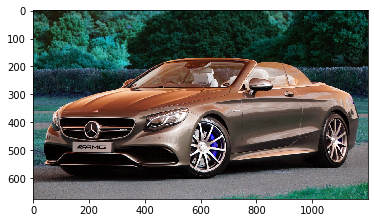

In [3]:
#使用OpenCV开源库读取图片数据
import cv2

from  matplotlib import pyplot as plt
%matplotlib inline

# 读取一张照片,把图片转换为2维的numpy数组
img = cv2.imread('../data/car.jpg')

#使用plt显示图像
plt.imshow(img)

# 显示img的数据类型及大小
print("数据类型:{},形状：{}".format(type(img),img.shape))


### 1.1.1 数组属性

在NumPy中，维度被称为轴，比如把轿车图像转换为一个NumPy之后的数组是1个三维数组，这个数组中有3个轴，这3个轴的长度分别为675、1200、3。
NumPy的ndarray对象有3个重要的属性。
- ndarray.ndim：数组的维度（轴）的个数。
- ndarray.shap：数组的维度，值是一个整数元祖，元祖的值代表其所对应的轴的长度。 比如对于二维数组，它用来表达这是个几行几列的矩阵，值为（x, y），其中x代表这个数组中有几行， y代表有几列。
- ndarray.dtype：数据类型，描述数组中元素的类型。
比如上面的img数组：

In [4]:
print("img数组的维度:",img.ndim)   #其值为：3
print("img数组的形状:",img.shape)  #其值为:(675, 1200, 3)
print("img数组的数据类型:",img.dtype)  #其值为: uint8

img数组的维度: 3
img数组的形状: (675, 1200, 3)
img数组的数据类型: uint8


为更好地理解ndarray对象的3个重要属性，我们把一维数组、二维数组、三维数组进行可视化，如图1-3所示。
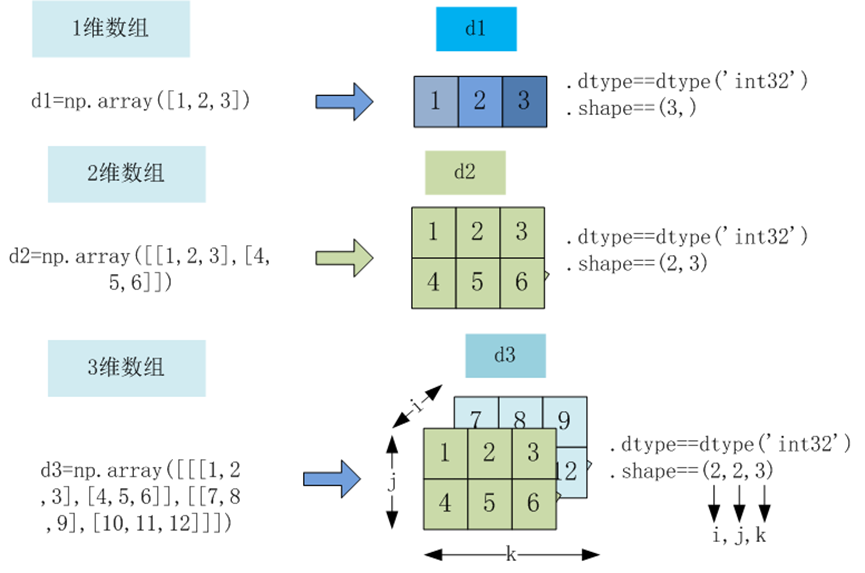
<center>图1-3 多维数组的可视化表示。</center>

### 1.1.2 从已有数据中创建数组
直接对 Python 的基础数据类型(如列表、元组等) 进行转换来生成 ndarray。  
（1）将列表转换成 ndarray

In [6]:
import numpy as np

lst1 = [3.14, 2.17, 0, 1, 2]
nd1 =np.array(lst1)
print(nd1)
print(type(nd1))

[3.14 2.17 0.   1.   2.  ]
<class 'numpy.ndarray'>


（2）嵌套列表可以转换成多维 ndarray

In [7]:
import numpy as np

lst2 = [[3.14, 2.17, 0, 1, 2], [1, 2, 3, 4, 5]]
nd2 =np.array(lst2)
print(nd2)
print(type(nd2))

[[3.14 2.17 0.   1.   2.  ]
 [1.   2.   3.   4.   5.  ]]
<class 'numpy.ndarray'>


如果把上面示例中的列表换成元组，上述方法也同样适合。

### 1.1.3 利用 random 模块生成数组
​	在深度学习中，我们经常需要对一些参数进行初始化，为了更有效训练模型，提高模型的性能，有些初始化还需要满足一定条件，如满足正态分布或均匀分布等。

|np.random模块常用函数 |
|----------------------|

| 函数              | 描述                       |
| :---------------- | :------------------------- |
| np.random.random  | 生成 0 到 1 之间的随机数   |
| np.random.uniform | 生成均匀分布随机数         |
| np.random.randn   | 生成标准正态的随机数       |
| np.random.randint | 生成随机的整数             |
| np.random.normal  | 生成正态分布               |
| np.random.shuffle | 随机打乱顺序               |
| np.random.seed    | 设置随机数种子             |
| random_sample     | 生成随机的浮点数           |

下面我们来看看一些函数的具体使用:

In [8]:
import numpy as np

print('生成形状(4, 4)，值在0-1之间的随机数:')
print(np.random.random((4, 4)), end='\n\n')

# 产生一个取值范围在[1, 50)之间的数组，数组的shape是(3, 3)
# 参数起始值（low）默认为0， 终止值（high）默认为1。
print('生成形状(3, 3)，值在low-high之间的随机整数::')
print(np.random.randint(low=1, high=50, size=(3,3)), end='\n\n')

print('产生的数组元素是均匀分布的随机数:')
print(np.random.uniform(low=1, high=3, size=(3, 3)), end='\n\n')

print('生成满足正态分布的形状为(3, 3)的矩阵:')
print(np.random.randn(3,3))

生成形状(4, 4)，值在0-1之间的随机数:
[[0.08047371 0.9260972  0.61262833 0.45484879]
 [0.0777875  0.96348652 0.40729428 0.43286744]
 [0.26075323 0.9125032  0.07875855 0.1660087 ]
 [0.8001766  0.14225026 0.46343394 0.61787428]]

生成形状(3, 3)，值在low-high之间的随机整数::
[[ 3  5 14]
 [42 23  2]
 [24 47 48]]

产生的数组元素是均匀分布的随机数:
[[1.75649901 1.31906715 1.7845616 ]
 [2.35355    1.65372087 2.88181346]
 [2.15810332 1.9383742  2.39094311]]

生成满足正态分布的形状为(3, 3)的矩阵:
[[-0.47421574 -1.64430668 -0.0805144 ]
 [-0.06083234  1.5563178   1.00165789]
 [-0.62739544 -1.77462449 -0.3438116 ]]


用以上方法生成的随机数是无法重现的，比如调用两次np.random.randn(3, 3), 输出结果一样的概率极低。如果我们想要多次生成同一份数据怎么办？我们可以使用np.random.seed函数设置种子。设置一个种子，然后调用随机函数产生一个数组，如果想要再次得到一个一模一样的数组，只要再次设置同样的种子就可以。

In [9]:
import numpy as np
np.random.seed(10)

print("按指定随机种子，第1次生成随机数:")
print(np.random.randint(1, 5, (2, 2)))

# 想要生成同样的数组，必须再次设置相同的种子
np.random.seed(10)
print("按相同随机种子，第2次生成的数据:")
print(np.random.randint(1, 5, (2, 2)))

按指定随机种子，第1次生成随机数:
[[2 2]
 [1 4]]
按相同随机种子，第2次生成的数据:
[[2 2]
 [1 4]]


### 1.1.4 创建特定形状的多维数组
参数初始化时，有时需要生成一些特殊矩阵，如全是 0 或 1 的数组或矩阵，这时我们可以利用np.zeros、np.ones、np.diag来实现，如表1-2所示。  
                     
                     
|表1-2 NumPy 数组创建函数|
|------------------------|

|函数	               |描述                                                           |
| :------------------- | :-------------------------------------------------------------|
np.zeros((3, 4))	   | 创建 3x4 的元素全为0的数组                                    |
np.ones((3,4))	       | 创建 3x4 的元素全为1的数组                                    |
np.empty( (2,3) )	   | 创建 2x3 的空数组，空数据中的值并不为0, 而是未初始化的垃圾值. |
np.zeros_like(ndarr)   | 以 ndarr 相同维度创建元素全为0数组                            |
np.ones_like(ndarr)	   | 以 ndarr 相同维度创建元素全为1数组                            |
np.empty_like(ndarr)   | 以 ndarr 相同维度创建空数组                                   |
np.eye(5)	           | 该函数用于创建一个5x5的矩阵，对角线为1，其余为0               |
np.full((3,5)，666)	   | 创建 3x5 的元素全为 666 的数组，666 为指定值                  |


下面我们通过几个示例来说明:

In [10]:
import numpy as np

# 生成全是 0 的 3x3 矩阵
nd5 =np.zeros([3, 3])
#生成与nd5形状一样的全0矩阵
#np.zeros_like(nd5)
# 生成全是 1 的 3x3 矩阵
nd6 = np.ones([3, 3])
# 生成 3 阶的单位矩阵
nd7 = np.eye(3)
# 生成 3 阶对角矩阵
nd8 = np.diag([1, 2, 3])
print("*"*6+"nd5"+"*"*6)
print(nd5)
print("*"*6+"nd6"+"*"*6)
print(nd6)
print("*"*6+"nd7"+"*"*6)
print(nd7)
print("*"*6+"nd8"+"*"*6)
print(nd8)

******nd5******
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
******nd6******
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
******nd7******
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
******nd8******
[[1 0 0]
 [0 2 0]
 [0 0 3]]


有时我们可能需要把生成的数据暂时保存起来，以备后续使用。

In [11]:
import numpy as np

nd9 =np.random.random([5, 5])
np.savetxt(X=nd9, fname='./test1.txt')
nd10 = np.loadtxt('./test1.txt')
print(nd10)


[[0.63364823 0.74880388 0.49850701 0.22479665 0.19806286]
 [0.76053071 0.16911084 0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096 0.61252607 0.72175532]
 [0.29187607 0.91777412 0.71457578 0.54254437 0.14217005]
 [0.37334076 0.67413362 0.44183317 0.43401399 0.61776698]]


### 1.1.5 利用 arange、linspace 函数生成数组
arange 是 numpy 模块中的函数，其格式为:   
**<font color = blue>np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)</font>**    
其中start 与 stop 指定范围，step 设定步长，生成一个 ndarray，start 默认为 0，步长 step 可为小数。Python有个内置函数range功能与此类似。  
它可以根据输入的指定数据范围以及等份数量，自动生成一个线性等分向量，其中endpoint (包含终点)默认为 True，等分数量num默认为 50。如果将retstep设置为 True，则会返回一个带步长的 ndarray。

In [12]:
import numpy as np

print(np.arange(10))
# [0 1 2 3 4 5 6 7 8 9]
print(np.arange(0, 10))
# [0 1 2 3 4 5 6 7 8 9]
print(np.arange(1, 4, 0.5))
# [1.  1.5 2.  2.5 3.  3.5]
print(np.arange(9, -1, -1))
# [9 8 7 6 5 4 3 2 1 0]


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[1.  1.5 2.  2.5 3.  3.5]
[9 8 7 6 5 4 3 2 1 0]


linspace 也是 numpy 模块中常用的函数，其格式为:   
**<font color = blue>arange([start,] stop[,step,], dtype=None)</font>**  
它可以根据输入的指定数据范围以及等份数量，自动生成一个线性等分向量，其中endpoint (包含终点)默认为 True，等分数量num默认为 50。如果将retstep设置为 True，则会返回一个带步长的 ndarray。

In [13]:
import numpy as np

print(np.linspace(0, 1, 10))


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


&emsp;&emsp; 值得一提的是，这里并没有像我们预期的那样，生成 0.1, 0.2, ... 1.0 这样步长为0.1的 ndarray，这是因为 linspace 必定会包含数据起点和终点，那么其步长则为(1-0) / 9 = 0.11111111。如果需要产生 0.1, 0.2, ... 1.0 这样的数据，只需要将数据起点 0 修改为 0.1 即可。  
&emsp;&emsp;除了上面介绍到的 arange 和 linspace函数，NumPy还提供了 logspace 函数，该函数的使用方法与linspace的使用方法一样，读者不妨自己动手试一下。

## 1.2 读取元素
上节介绍了生成ndarray的几种方法，当生成数据后，如何读取我们需要的数据呢？这节将介绍几种常用的读取数据的方法。

In [14]:
import numpy as np
np.random.seed(2019)
nd11 = np.random.random([10])
#获取指定位置的数据，获取第4个元素
nd11[3]
#截取一段数据
nd11[3:6]
#截取固定间隔数据
nd11[1:6:2]
#倒序取数
nd11[::-2]
#截取一个多维数组的一个区域内数据
nd12=np.arange(25).reshape([5,5])
nd12[1:3,1:3]
#截取一个多维数组中，数值在一个值域之内的数据
nd12[(nd12>3)&(nd12<10)]
#截取多维数组中，指定的行,如读取第2,3行
nd12[[1,2]]  #或nd12[1:3,:]
##截取多维数组中，指定的列,如读取第2,3列
nd12[:,1:3]

array([[ 1,  2],
       [ 6,  7],
       [11, 12],
       [16, 17],
       [21, 22]])

如果对上面这些获取方式还不是很清楚，没关系，下面我们通过图形的方式进一步说明，如图1-1所示，左边为表达式，右边为表达式获取的元素。注意不同的边界，表示不同的表达式。
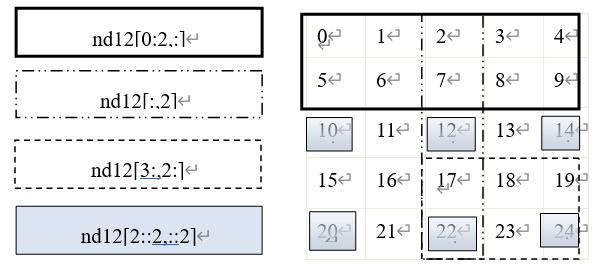
<center>图1-1 获取多维数组中的元素</center>

除了可以通过指定索引标签获取数组中的部分元素外，还可以使用一些函数来实现，如可以通过random.choice函数从指定的样本中随机抽取数据。

In [15]:
import numpy as np
from numpy import random as nr

a=np.arange(1,25,dtype=float)
c1=nr.choice(a,size=(3,4))  #size指定输出数组形状
c2=nr.choice(a,size=(3,4),replace=False)  #replace缺省为True，即可重复抽取。
#下式中参数p指定每个元素对应的抽取概率，缺省为每个元素被抽取的概率相同。
c3=nr.choice(a,size=(3,4),p=a / np.sum(a))
print("随机可重复抽取")
print(c1)
print("随机但不重复抽取")
print(c2)
print("随机但按制度概率抽取")
print(c3)

随机可重复抽取
[[19.  6. 24. 22.]
 [21. 17. 16.  2.]
 [23. 15. 13. 11.]]
随机但不重复抽取
[[ 5. 14. 23. 15.]
 [ 8. 24.  6. 18.]
 [13. 10. 21. 11.]]
随机但按制度概率抽取
[[19. 21. 18. 11.]
 [10. 21. 23. 19.]
 [18. 19. 11. 20.]]


## 1.3 Numpy的算术运算
机器学习和深度学习中涉及大量的数组或矩阵运算，这节将重点介绍两种常用的运算。一种是对应元素相乘，又称为逐元乘法(Element-Wise Product)，或哈达玛积（Hadamard Product），运算符为np.multiply(), 或 *。另一种是点积或内积元素，运算符为np.dot()。

### 1.3.1遂元素操作
遂元素操作（又称为对应元素相乘）是两个矩阵中对应元素乘积。np.multiply 函数用于数组或矩阵对应元素相乘，输出的大小与相乘数组或矩阵的大小一致，其格式如下:  
**<font color = blue>numpy.multiply(x1, x2, /, out=None, *, where=True,casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])</font>**   
其中x1，x2之间的对应元素相乘遵守广播规则，Numpy的广播规则本章第7小节将介绍。以下我们通过一些示例来进一步说明。

In [16]:
A = np.array([[1, 2], [-1, 4]])
B = np.array([[2, 0], [3, 4]])
A*B

array([[ 2,  0],
       [-3, 16]])

In [17]:
#或另一种表示方法
np.multiply(A,B)


array([[ 2,  0],
       [-3, 16]])

矩阵A和B的对应元素相乘(又称为遂元素相乘)，用图1-2直观表示为：
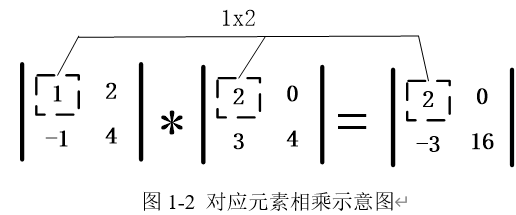
NumPy数组不仅可以和数组进行对应元素相乘，也可以和单一数值（或称为标量）进行运算。运算时，NumPy数组的每个元素和标量进行运算，其间会用到广播机制，例如：

In [18]:
print(A*2.0)
print(A/2.0)

[[ 2.  4.]
 [-2.  8.]]
[[ 0.5  1. ]
 [-0.5  2. ]]


由此，推而广之，数组通过一些激活函数后，输出与输入形状一致。

In [19]:
X=np.random.rand(2,3)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

print("输入参数X的形状：",X.shape)
print("激活函数sigmoid输出形状：",sigmoid(X).shape)
print("激活函数relu输出形状：",relu(X).shape)
print("激活函数softmax输出形状：",softmax(X).shape)


输入参数X的形状： (2, 3)
激活函数sigmoid输出形状： (2, 3)
激活函数relu输出形状： (2, 3)
激活函数softmax输出形状： (2, 3)


### 1.3.2 点积运算
点积运算（dot product）又称为内积，在Numpy用np.dot表示，其一般格式为：  
**<font color = blue>numpy.dot(a, b, out=None)</font>**    
以下通过一个示例来说明dot的具体使用及注意事项。

In [20]:
X1=np.array([[1,2],[3,4]])
X2=np.array([[5,6,7],[8,9,10]])
X3=np.dot(X1,X2)
print(X3)

[[21 24 27]
 [47 54 61]]


以上运算，用图1-3可表示为：
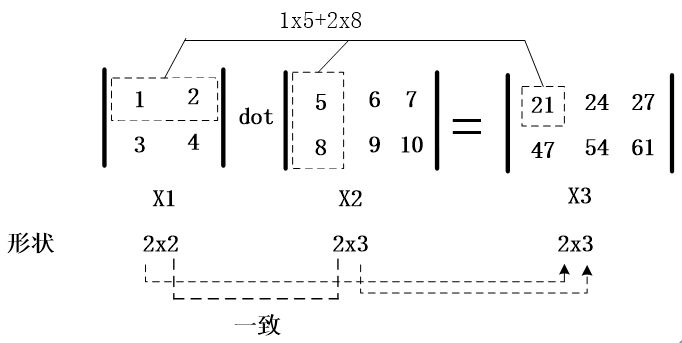
<center>图1-6  矩阵的点积示意图，对应维度的元素个数需要保持一致</center>
如图1-6所示，矩阵X1和矩阵X2进行点积运算，其中X1和X2对应维度（即X1的第2个维度与X2的第1个维度）的元素个数必须保持一致，此外，矩阵X3是由矩阵X1的行数与矩阵X2的列数构成的。  
	点积运算在神经网络中使用非常频繁，如图1-7所示的神经网络，输入I与权重矩阵W之间的运算就是点积运算。

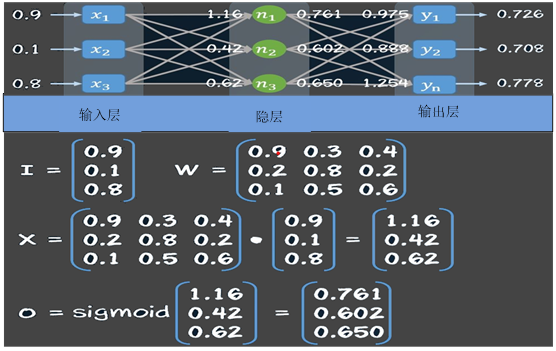
<center>图1-7 内积运算可视化示意图</center>

## 1.4 数组变形
在机器学习以及深度学习的任务中，我们通常需要将处理好的数据以模型能接收的格式发送给模型，然后由模型通过一系列运算，最终返回一个处理结果。然而，由于不同模型所接收的输入格式不一样，往往需要先对其进行一系列变形和运算，将数据处理成符合模型要求的格式。最常见的是矩阵或者数组的运算，我们经常会遇到需要把多个向量或矩阵按某轴方向合并，或展平（如在卷积或循环神经网络中，在全连接层之前，需要把矩阵展平）的情况。下面介绍几种常用数据变形方法。

### 1.4.1 更改数组的形状
修改指定数组的形状是 NumPy 中最常见的操作之一，常见的方法有很多，表1-3 列出了一些常用函数。

|表1-3 列出了一些常用函数|
| -----------------------|

|函数	           |描述                                                                     |
| :----------------| :-----------------------------------------------------------------------|
| arr.reshape	   |  重新将向量arr维度进行改变，不修改向量本身                              |
| arr.resize	   | 重新将向量arr维度进行改变，修改向量本身                                 |
| arr.T	           | 对向量 arr 进行转置                                                     |
| arr.ravel	       |  对向量 arr 进行展平，即将多维数组变成1维数组，不会产生原数组的副本     |
| arr.flatten	   | 对向量 arr 进行展平，即将多维数组变成1维数组，返回原数组的副本          |
| arr.squeeze	   | 只能对维数为1的维度降维。对多维数组使用过不会报错，但是不会产生任何影响 |
| arr.transpose	   |  对高维矩阵进行轴对换                                                   |

下面我们来看一些示例:  
1）reshape

In [21]:
import numpy as np

arr =np.arange(10)
print(arr)
# 将向量 arr 维度变换为2行5列
print(arr.reshape(2, 5))
# 指定维度时可以只指定行数或列数, 其他用 -1 代替
print(arr.reshape(5, -1))
print(arr.reshape(-1, 5))


[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


值得注意的是，reshape 函数支持只指定行数或列数，剩余的设置为-1即可。所指定的行数或列数一定要能被整除（如10不能被3整除），例如上面代码如果修改为arr.reshape(3,-1)将报错误。  
2）resize

In [22]:
import numpy as np

arr =np.arange(10)
print(arr)
# 将向量 arr 维度变换为2行5列
arr.resize(2, 5)
print(arr)


[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]


3）.T转置函数

In [23]:
import numpy as np

arr =np.arange(12).reshape(3,4)
# 向量 arr 为3行4列
print(arr)
# 将向量 arr 进行转置为4行3列
print(arr.T)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


4）ravel函数  
ravel 函数接收一个根据C语言格式（即按行优先排序）或者Fortran语言格式（即按列优先排序）来进行展平的参数，默认情况下是按行优先排序。

In [24]:
import numpy as np

arr =np.arange(6).reshape(2, -1)
print(arr)
# 按照列优先，展平
print("按照列优先，展平")
print(arr.ravel('F'))
# 按照行优先，展平
print("按照行优先，展平")
print(arr.ravel())


[[0 1 2]
 [3 4 5]]
按照列优先，展平
[0 3 1 4 2 5]
按照行优先，展平
[0 1 2 3 4 5]


5）flatten(order='C')函数。  
把矩阵转换为向量，展平方式默认是行优先（即参数order='C'），这种需求经常出现在卷积网络与全连接层之间。

In [25]:
import numpy as np
a =np.floor(10*np.random.random((3,4)))
print(a)
print(a.flatten(order='C'))

[[9. 4. 5. 0.]
 [2. 6. 3. 7.]
 [7. 4. 3. 1.]]
[9. 4. 5. 0. 2. 6. 3. 7. 7. 4. 3. 1.]


Flatten（展平）运算，在神经网络中经常使用，一般在网络的后面需要把2维、3维等多维数组转换为一维数组，此时就需要用到展平这个操作，如图1-8所示。
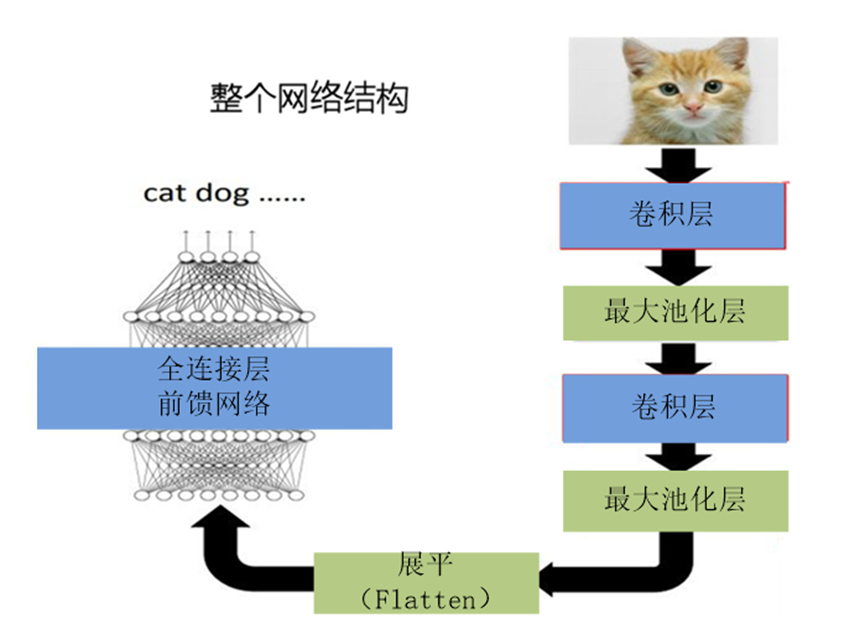
<center>图1-8 含flatten运算的神经网络示意图</center>

6）squeeze函数。  
	squeeze函数是一个主要用于降维的函数，可以把矩阵中含1的维度去掉。

In [26]:
import numpy as np

arr =np.arange(3).reshape(3, 1)
print(arr.shape)  #(3,1)
print(arr.squeeze().shape)  #(3,)
arr1 =np.arange(6).reshape(3,1,2,1)
print(arr1.shape) #(3, 1, 2, 1)
print(arr1.squeeze().shape) #(3, 2)

(3, 1)
(3,)
(3, 1, 2, 1)
(3, 2)


7）transpose函数  
	transpose函数主要用于对高维矩阵进行轴对换，在深度学习中经常用到，比如把图像表示颜色的RGB顺序改为GBR的顺序。

In [27]:
import numpy as np

arr2 = np.arange(24).reshape(2,3,4)
print(arr2.shape)  #(2, 3, 4)
print(arr2.transpose(1,2,0).shape)  #(3, 4, 2)

(2, 3, 4)
(3, 4, 2)


### 1.4.2 合并数组
合并数组也是最常见的操作之一，表1-4列举了常用的用于数组或向量合并的方法。

|表1-4 NumPy 数组合并方法|
| -----------------------|

|函数	           |描述                                  |
| :----------------| :------------------------------------|
| np.append	       |内占用大                              |
| np.concatenate   |没有内存问题                          |
| np.stack	       |沿着新的轴加入一系列数组              |
| np.hstack	       |堆栈数组垂直顺序(行)                  |
| np.vstack	       |堆栈数组垂直顺序(列)                  |
| np.dstack	       |堆栈数组按顺序深入(沿第三维)          |
| np.vsplit	       |将数组分解成垂直的多个子数组的列表    |
|zip([iterable, ...]) |将对象中对应的元素打包成一个个元组构成的zip对象|

[说明]  
①append、concatnate以及stack都有一个 axis 参数，用于控制数组合并是按行还是按列，NumPy引入了axis的概念：axis参数实际上是所讨论索引的数量：第一个索引是axis=0，第二个索引是axis=1，等等。如下图所示，在二维数组中，如果axis=0，说明按列操作，如果axis=1说明按行计算。
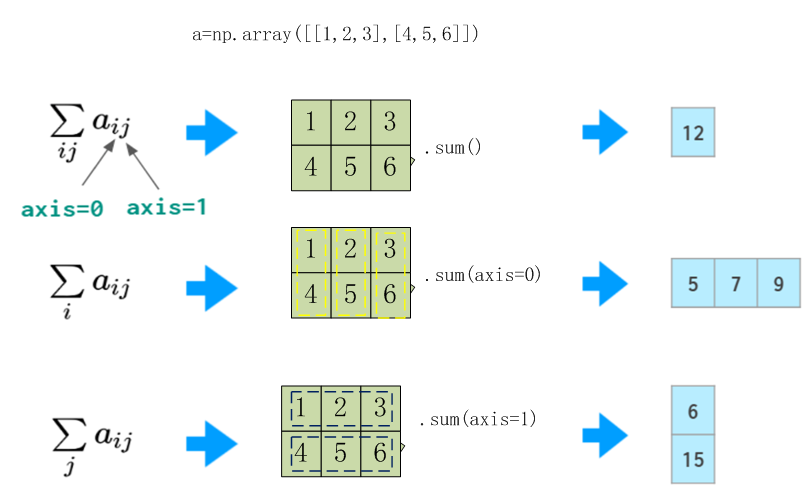
②对于append和concatnate，待合并的数组必须有相同的行数或列数(满足一个即可)。  
③stack、hstack、dstack待合并的数组必须具有相同的形状( shape)。  
	下面选择一些常用函数进行说明。  
1）append  
合并一维数组


In [28]:
import numpy as np

a =np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.append(a, b)
print(c) 

[1 2 3 4 5 6]


合并多维数组

In [29]:
import numpy as np

a =np.arange(4).reshape(2, 2)
b = np.arange(4).reshape(2, 2)
# 按行合并
c = np.append(a, b, axis=0)
print('按行合并后的结果')
print(c)
print('合并后数据维度', c.shape)
# 按列合并
d = np.append(a, b, axis=1)
print('按列合并后的结果')
print(d)
print('合并后数据维度', d.shape)


按行合并后的结果
[[0 1]
 [2 3]
 [0 1]
 [2 3]]
合并后数据维度 (4, 2)
按列合并后的结果
[[0 1 0 1]
 [2 3 2 3]]
合并后数据维度 (2, 4)


2).concatenate  
沿指定轴连接数组或矩阵：

In [30]:
import numpy as np
a =np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

c = np.concatenate((a, b), axis=0)
print(c)
d = np.concatenate((a, b.T), axis=1)
print(d)


[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]


3）stack  
沿指定轴堆叠数组或矩阵

In [31]:
import numpy as np

a =np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(np.stack((a, b), axis=0))

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


4)zip  
zip是Python的一个内置函数，多用于张量运算中。

In [1]:
import numpy as np

a =np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c=c=zip(a,b)
for i,j in c:
    print(i, end=",")
    print(j)

[1 2],[5 6]
[3 4],[7 8]


## 1.5 批量处理
&emsp;&emsp;在深度学习中，由于源数据都比较大，所以通常需要采用批处理。如利用批量来计算梯度的随机梯度法（SGD），就是一个典型应用。深度学习的计算一般比较复杂，加上数据量一般比较大，如果一次处理整个数据，往往出现资源瓶颈。为了更有效的计算，一般将整个数据集分成小批量。与处理整个数据集的另一个极端是每次处理一条记录，这种方法也不科学，一次处理一条记录无法充分发挥GPU、Numpy平行处理优势。因此，实际使用中往往采用批量处理（mini-batch）。
	如何把大数据拆分成多个批次呢？可采用如下步骤：  
（1）得到数据集  
（2）随机打乱数据  
（3）定义批大小  
（4）批处理数据集  
	以下我们通过一个示例来具体说明：

In [34]:
import numpy as np
#生成10000个形状为2X3的矩阵
data_train = np.random.randn(10000,2,3)
#这是一个3维矩阵，第一个维度为样本数，后两个是数据形状
print(data_train.shape)
#(10000,2,3)
#打乱这10000条数据
np.random.shuffle(data_train)
#定义批量大小
batch_size=100
#进行批处理
for i in range(0,len(data_train),batch_size):
    x_batch_sum=np.sum(data_train[i:i+batch_size])
    print("第{}批次,该批次的数据之和:{}".format(i,x_batch_sum))


(10000, 2, 3)
第0批次,该批次的数据之和:5.5780579986508
第100批次,该批次的数据之和:-47.543774988282856
第200批次,该批次的数据之和:26.107407146319012
第300批次,该批次的数据之和:-26.405107565787496
第400批次,该批次的数据之和:-27.782361443199072
第500批次,该批次的数据之和:4.237439895458259
第600批次,该批次的数据之和:3.5975416060320313
第700批次,该批次的数据之和:-16.569913283732195
第800批次,该批次的数据之和:23.35629338489166
第900批次,该批次的数据之和:-0.7764243755135087
第1000批次,该批次的数据之和:24.021765531685112
第1100批次,该批次的数据之和:-34.934841176590375
第1200批次,该批次的数据之和:21.844482577744493
第1300批次,该批次的数据之和:11.78424017827581
第1400批次,该批次的数据之和:20.39357133668674
第1500批次,该批次的数据之和:4.453783059609309
第1600批次,该批次的数据之和:-35.67947644198051
第1700批次,该批次的数据之和:11.33629580421406
第1800批次,该批次的数据之和:10.081223365935935
第1900批次,该批次的数据之和:5.2707308233175265
第2000批次,该批次的数据之和:-0.5889700968964533
第2100批次,该批次的数据之和:18.831083481368776
第2200批次,该批次的数据之和:4.262182638335309
第2300批次,该批次的数据之和:0.9839106193011666
第2400批次,该批次的数据之和:-33.323155048944145
第2500批次,该批次的数据之和:-19.332412993204912
第2600批次,该批次的数据之和:11.941681586288183
第2700批次,该批次的数据之和:14.9300436

## 1.6 节省内存

在NumPy操作数据过程中，有大量涉及变量、数组的操作，尤其在机器学习、深度学习中，参数越来越多，数据量也越来越大，如何有效保存、更新这些参数，将直接影响内存的使用。这里我们介绍几种节省内存的简单方法。  
1. 使用X=X+Y与X += Y的区别  
	假设X、Y为向量或矩阵，这种操作在机器学习中非常普遍。两个表达式从数学角度来说是完全一样的，但对使用内存的开销来说，却完全不同。X += Y操作可减少内存开销。  
	下面我们用Python的id()函数来说明。id()函数提供了内存中引用对象的确切地址。 运行X = X+Y后，我们会发现id(X)指向另一个位置。 这是因为Python首先计算X+Y，为结果分配新的内存，然后使X指向内存中的这个新位置。


In [35]:
Y = np.random.randn(10,2,3)
X=np.zeros_like(Y)
print(id(X))
X=X+Y
print(id(X))

2233521033984
2233521033264


X在运行X=X+Y前后id不同，说明指向不同内存区域。

In [36]:
Y = np.random.randn(10,2,3)
X=np.zeros_like(Y)
print(id(X))
X+=Y
print(id(X))

2233521034384
2233521034384


X在运行X+=Y前后id相同，说明指向一个内存区域。  
2. X=X+Y与X[:]=X+Y的区别  
实现代码如下：  

In [37]:
Y = np.random.randn(10,2,3)
X=np.zeros_like(Y)
print(id(X))
X=X+Y
print(id(X))

2233521034944
2233521034384


X在运行X=X+Y前后id不同，说明指向不同内存区域。

In [38]:
Y = np.random.randn(10,2,3)
X=np.zeros_like(Y)
print(id(X))
X[:]=X+Y
print(id(X))

2233521035584
2233521035584


## 1.7 通用函数
NumPy提供了两种基本的对象，即ndarray和ufunc对象。前面我们介绍了ndarray，本节将介绍Numpy的另一个对象通用函数(ufunc)，ufunc是universal function的缩写，它是一种能对数组的每个元素进行操作的函数。许多ufunc函数都是用c语言级别实现的，因此它们的计算速度非常快。此外，它们比math模块中函数更灵活。math模块的输入一般是标量，但NumPy中函数可以是向量或矩阵，而利用向量或矩阵可以避免使用循环语句，这点在机器学习、深度学习中非常重要。表1-5为NumPy常用的几个通用函数。

|表1-5   NumPy几个常用通用函数|
| ----------------------------|

|函数	            |使用方法       |
| :---------------- | :------------------------|
| sqrt	            | 计算序列化数据的平方根   |
| sin,cos     	    | 三角函数                 |
| abs	            | 计算序列化数据的绝对值   |
| dot	            | 矩阵运算                 |
| log,log10,log2	| 对数函数                 |
| exp	            | 指数函数                 |
| cumsum,cumproduct	| 累计求和，求积           |
| sum	            | 对一个序列化数据进行求和 |
| mean	            | 计算均值                 |
| median	        |  计算中位数              |
| std	            | 计算标准差               |
| var	            | 计算方差                 |
| corrcoef	        | 计算相关系数             |



【说明】np.max,np.sum,np.min等函数中，都涉及一个有关轴的参数（即axis），该参数的具体含义，可参考图1-9。
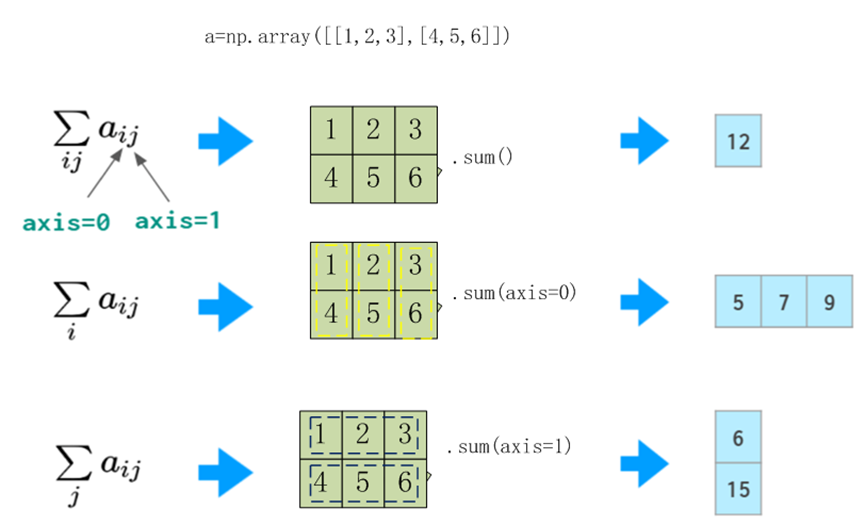
<center>图1-9 可视化参数axis的具体含义</center>

（1）math与numpy函数的性能比较：

In [39]:
import time
import math
import numpy as np

x = [i * 0.001 for i in np.arange(1000000)]
start = time.process_time()
for i, t in enumerate(x):
    x[i] = math.sin(t)
print ("math.sin:{:.4f}".format(time.process_time() - start) )

x = [i * 0.001 for i in np.arange(1000000)]
x = np.array(x)
start = time.process_time()
np.sin(x)
print ("numpy.sin:{:.4f}".format(time.process_time() - start) )

math.sin:0.2656
numpy.sin:0.0000


由此可见，numpy.sin比math.sin相差很大！  
（2）循环与向量运算比较：  
	充分使用Python的Numpy库中的内建函数（built-in function），实现计算的向量化，可大大提高运行速度。NumPy库中的内建函数使用了SIMD指令。如下使用的向量化要比使用循环计算速度快得多。如果使用GPU，其性能将更强大,不过NumPy不支持GPU。Pytorch支持GPU，第5章将介绍Pytorch如何使用GPU来加速算法。


In [40]:
import time
import numpy as np

x1 = np.random.rand(1000000)
x2 = np.random.rand(1000000)
##使用循环计算向量点积
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n for loop----- Computation time = " + str(1000*(toc - tic)) + "ms")
##使用numpy函数求点积
tic = time.process_time()
dot = 0
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n verctor version---- Computation time = " + str(1000*(toc - tic)) + "ms")


dot = 250069.56223667783
 for loop----- Computation time = 437.5ms
dot = 250069.56223667995
 verctor version---- Computation time = 0.0ms


从运行结果上来看，使用for循环的运行时间大约是向量运算的500倍。因此，深度学习算法中，一般都使用向量化矩阵运算。  
**<font color = red>【延伸说明】</font>**   
由于Python列表与NumPy向量的结构不同，如下图所示：
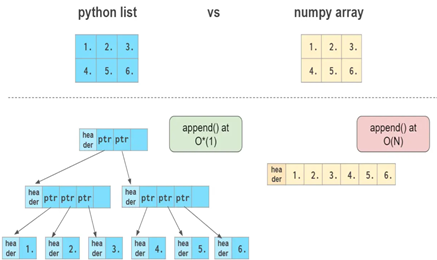
对NumPy的操作一般比Python列表快，但在末尾添加元素比Python列表慢。
在末尾添加元素时，Python列表复杂度为O(1)，而NumPy复杂度为O(N)。

## 1.8 广播机制
Numpy的Universal functions 中要求输入的数组shape是一致的，当数组的shape不相等的时候，则会使用广播机制。不过，调整数组使得shape一样，需满足一定规则，否则将出错。这些规则可归结为以下四条：  
（1）让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐；
如：a：2x3x2     b：3x2，则b向a看齐，在b的前面加1：变为：1x3x2  
（2）输出数组的shape是输入数组shape的各个轴上的最大值；   
（3）如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错；  
（4）当输入数组的某个轴的长度为1时，沿着此轴运算时都用（或复制）此轴上的第一组值。  
	广播在整个NumPy中用于决定如何处理形状迥异的数组；涉及算术运算包括(+，-，*，/…)。这些规则说的很严谨，但不直观，下面我们结合图形与代码进一步说明：  
目的：A+B
其中A为4x1矩阵，B为一维向量 (3,)  
要相加，需要做如下处理：  
（1）根据规则1，B需要向看齐，把B变为（1,3）  
（2）根据规则2，输出的结果为各个轴上的最大值，即输出结果应该为（4,3）矩阵  
那么A如何由（4,1）变为（4,3）矩阵？B如何由（1,3）变为（4,3）矩阵？  
（3）根据规则4，用此轴上的第一组值（要主要区分是哪个轴），进行复制（但在实际处理中不是真正复制，否则太耗内存，而是采用其它对象如ogrid对象，进行网格处理）即可，详细处理如图1-4所示。
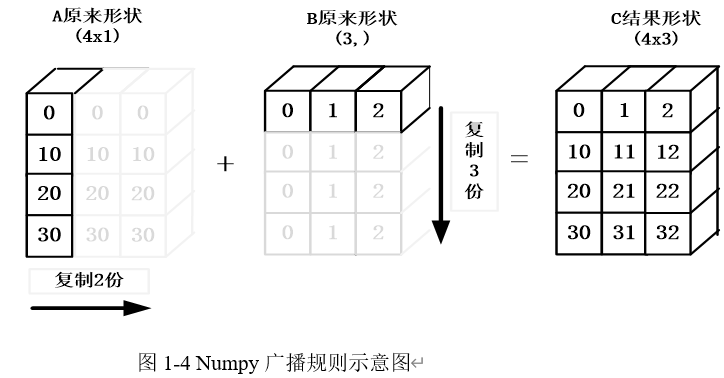
代码实现

In [41]:
import numpy as np
A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
print("A矩阵的形状:{},B矩阵的形状:{}".format(A.shape,B.shape))
C=A+B
print("C矩阵的形状:{}".format(C.shape))
print(C)


A矩阵的形状:(4, 1),B矩阵的形状:(3,)
C矩阵的形状:(4, 3)
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
